# Alex NLP Project

# Usefuk
* https://stackabuse.com/python-for-nlp-working-with-text-and-pdf-files/
* https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
* https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
* https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
* https://machinelearningmastery.com/clean-text-machine-learning-python/

In [1]:
import docx2txt
from collections import Counter

In [2]:

## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import regex as re
import spacy
import nltk
import string

In [3]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [4]:
from csv import reader
from wordcloud import WordCloud, STOPWORDS 

In [5]:
import seaborn as sns

# Word Document

In [6]:
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Anybody up for.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/1A. The Aqueduct of Segovia.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/ROMANCING1.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Pride and Prejudice.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Alice Adventures.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/ClimateArticle_Published_corr.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/FourCollidingCouples_210119.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/The witness.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/The witness - badspelling.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Treasure Island.docx')


#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/holybible.docx')

my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/koran.docx')

#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Pitch Deck v08 A4.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Data Scientist - Collaboration.docx')








In [7]:
print(type(my_text))

<class 'str'>


In [8]:
#print(my_text)

In [9]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

# from Jason

In [10]:
words = my_text.split()

In [11]:
len(words)

386920

In [12]:
print(words[:100])

['Koran', 'Introduction', '1.', 'Life', 'of', 'the', 'Prophet', 'Muhammad*', 'Before', 'prophethood', 'It', 'was', 'in', 'the', 'year', '571', 'C.E.', 'that', 'the', 'Prophet', 'Muhammad', 'was', 'born.', 'He', 'came', 'of', 'the', 'noblest', 'family', 'of', 'Arabia,', 'the', 'Quraish,', 'who', 'were', 'held', 'in', 'the', 'highest', 'esteem,', 'being', 'guardians', 'of', 'the', 'Sacred', 'House', 'at', 'Makkah,', 'the', "Ka'bah,", 'the', 'spiritual', 'centre', 'of', 'the', 'whole', 'of', 'Arabia.', 'At', 'the', 'time', 'of', 'his', 'birth', 'Arabia', 'was', 'steeped', 'deep', 'in', 'the', 'worst', 'form', 'of', 'idolatry', 'that', 'has', 'ever', 'prevailed', 'in', 'any', 'country.', 'The', "Ka'bah", 'itself', 'was', 'full', 'of', 'idols,', 'and', 'every', 'household', 'had,', 'in', 'addition,', 'its', 'own', 'idols.', 'Unhewn', 'stones,', 'trees']


In [13]:
words2 = re.split(r'\W+', my_text)


In [14]:
print(words2[:100])

['Koran', 'Introduction', '1', 'Life', 'of', 'the', 'Prophet', 'Muhammad', 'Before', 'prophethood', 'It', 'was', 'in', 'the', 'year', '571', 'C', 'E', 'that', 'the', 'Prophet', 'Muhammad', 'was', 'born', 'He', 'came', 'of', 'the', 'noblest', 'family', 'of', 'Arabia', 'the', 'Quraish', 'who', 'were', 'held', 'in', 'the', 'highest', 'esteem', 'being', 'guardians', 'of', 'the', 'Sacred', 'House', 'at', 'Makkah', 'the', 'Ka', 'bah', 'the', 'spiritual', 'centre', 'of', 'the', 'whole', 'of', 'Arabia', 'At', 'the', 'time', 'of', 'his', 'birth', 'Arabia', 'was', 'steeped', 'deep', 'in', 'the', 'worst', 'form', 'of', 'idolatry', 'that', 'has', 'ever', 'prevailed', 'in', 'any', 'country', 'The', 'Ka', 'bah', 'itself', 'was', 'full', 'of', 'idols', 'and', 'every', 'household', 'had', 'in', 'addition', 'its', 'own', 'idols']


In [15]:
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]

In [17]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))


In [18]:
stripped = [re_punc.sub('', w) for w in words]


In [19]:
print(stripped[:100])


['Koran', 'Introduction', '1', 'Life', 'of', 'the', 'Prophet', 'Muhammad', 'Before', 'prophethood', 'It', 'was', 'in', 'the', 'year', '571', 'CE', 'that', 'the', 'Prophet', 'Muhammad', 'was', 'born', 'He', 'came', 'of', 'the', 'noblest', 'family', 'of', 'Arabia', 'the', 'Quraish', 'who', 'were', 'held', 'in', 'the', 'highest', 'esteem', 'being', 'guardians', 'of', 'the', 'Sacred', 'House', 'at', 'Makkah', 'the', 'Kabah', 'the', 'spiritual', 'centre', 'of', 'the', 'whole', 'of', 'Arabia', 'At', 'the', 'time', 'of', 'his', 'birth', 'Arabia', 'was', 'steeped', 'deep', 'in', 'the', 'worst', 'form', 'of', 'idolatry', 'that', 'has', 'ever', 'prevailed', 'in', 'any', 'country', 'The', 'Kabah', 'itself', 'was', 'full', 'of', 'idols', 'and', 'every', 'household', 'had', 'in', 'addition', 'its', 'own', 'idols', 'Unhewn', 'stones', 'trees']


In [20]:
table = str.maketrans('', '', string.punctuation)

In [21]:
print(table)

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


In [22]:
from pandas import DataFrame

In [23]:
print(type(stripped))

<class 'list'>


In [24]:
stripped_df = DataFrame (stripped,columns=['Words'])

In [25]:
stripped_df.shape  ## Good

(386920, 1)

In [26]:
stripped_df.nunique()

Words    18521
dtype: int64

In [27]:
stripped_df.head()

,Words
0,Koran
1,Introduction
2,1
3,Life
4,of


In [28]:
re_print = re.compile('[^%s]' % re.escape(string.printable))


In [29]:
result = [re_print.sub('', w) for w in words]


In [30]:
words = [word.lower() for word in words]
print(words[:100])

['koran', 'introduction', '1.', 'life', 'of', 'the', 'prophet', 'muhammad*', 'before', 'prophethood', 'it', 'was', 'in', 'the', 'year', '571', 'c.e.', 'that', 'the', 'prophet', 'muhammad', 'was', 'born.', 'he', 'came', 'of', 'the', 'noblest', 'family', 'of', 'arabia,', 'the', 'quraish,', 'who', 'were', 'held', 'in', 'the', 'highest', 'esteem,', 'being', 'guardians', 'of', 'the', 'sacred', 'house', 'at', 'makkah,', 'the', "ka'bah,", 'the', 'spiritual', 'centre', 'of', 'the', 'whole', 'of', 'arabia.', 'at', 'the', 'time', 'of', 'his', 'birth', 'arabia', 'was', 'steeped', 'deep', 'in', 'the', 'worst', 'form', 'of', 'idolatry', 'that', 'has', 'ever', 'prevailed', 'in', 'any', 'country.', 'the', "ka'bah", 'itself', 'was', 'full', 'of', 'idols,', 'and', 'every', 'household', 'had,', 'in', 'addition,', 'its', 'own', 'idols.', 'unhewn', 'stones,', 'trees']


In [31]:
#stop_words = set(stopwords.words('english'))
#words = [w for w in words if not w in stop_words]
#print(words[:100])


# Get to Sentences

In [32]:
sentences = nltk.sent_tokenize(my_text)

In [33]:
#print(sentences)

In [34]:
TestS =['TestAlex']

In [35]:
#TestSdf=pd.DataFrame( list(reader(TestS)))

In [36]:
i=0
matrix=[]
for sentence in sentences:

    #print(sentence)
    #print()
    # Extra below
    matrix.append(sentence)
    #print(type(sentence))
    i += 1
   

In [37]:
 sentence_df = pd.DataFrame(matrix,columns=['Sentence'])

In [38]:
sentence_df.head()

,Sentence
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...
2,that the Prophet Muhammad was born.
3,"He came of the noblest family of Arabia, the Q..."
4,At the time of his birth Arabia was steeped de...


In [39]:
sentence_df.shape

(17269, 1)

In [40]:
sentence_df.nunique

<bound method DataFrame.nunique of                                                 Sentence
0      Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...
1      Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...
2                    that the Prophet Muhammad was born.
3      He came of the noblest family of Arabia, the Q...
4      At the time of his birth Arabia was steeped de...
...                                                  ...
17264  In 1914, when an internal danger arose within ...
17265  From then till his death in 1951, Maulana Muha...
17266  His books \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
17267  (See a \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tlis...
17268  His \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tlast w...

[17269 rows x 1 columns]>

In [41]:
sentence_df['Sentence'].value_counts()

In the name of Allah, the Beneficent, the Merciful.                                                                                                                                                                                                                                                                                                                                   35
.                                                                                                                                                                                                                                                                                                                                                                                     28
It is one of the earliest revelations.                                                                                                                                                                                                                

In [42]:
#TestSdf.head()

In [43]:
#TestS2=pd.DataFrame( list(reader(TestS))

In [44]:
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    #print(words)
    #print()

In [45]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet



In [46]:
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    """
    Print the results of stemmind and lemmitization using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()




In [47]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [48]:
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive



In [49]:

from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
stop_words = set(stopwords.words("english"))

In [51]:
type(sentences)

list

In [52]:
#words = nltk.word_tokenize(sentences) ##??

In [53]:
#re.findall('Sineads', my_text)

In [54]:
len(set(my_text.split(' ')))

38333

remove text or content, e.g. quotes (") or metadata (===)
add content or markers, e.g. (#FLAG, --NAME--)
remove or convert special symbols, e.g. "é" to "e"
remove or convert emoticons

In [55]:
my_text = re.sub(r'[="]', '', my_text)

In [56]:
#my_text = re.sub(r'[=\n]', '', my_text)

#print(my_text[:1000])

# Split Doc into smaller
* https://stackoverflow.com/questions/291740/how-do-i-split-a-huge-text-file-in-python

import logging.handlers
log = logging.getLogger()
fh = logging.handlers.RotatingFileHandler("my_text", 
     maxBytes=2**20*100, backupCount=100) 
# 100 MB each, up to a maximum of 100 files


log.addHandler(fh)
log.setLevel(logging.INFO)
f = open("my_text")


while True:
    log.info(f.readline().strip())

# spaCy model invocation and text processing
##spaCy does the processing of the text as part of the reading of the data

In [57]:
import spacy

In [58]:
# load spaCy and the English model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 5030000 

# process the text
doc = nlp(my_text)

In [59]:
#print(doc)

# Tokenise

for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    #if t.text == '.':
    #    break

# Label

for entity in doc.ents:
        print(entity.text,entity.label_)

# Tokenise

## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    #if t.text == '.':
     #   break

In [60]:
# extra

In [61]:
## spaCy
good_word_matrix=[]
for i, t in enumerate(doc):
    if not t.is_stop:
        #print(t.text)
        good_word_matrix.append(t.text)
    


In [62]:
good_word_df= pd.DataFrame(good_word_matrix,columns=['good_words'])

In [63]:
good_word_df.shape

(267627, 1)

In [64]:
good_word_df.head()

,good_words
0,Koran
1,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...
2,Introduction
3,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...
4,1


In [65]:
good_word_df.tail()

,good_words
267622,edition
267623,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t
267624,published
267625,1951
267626,.


In [66]:
print("There are {} observations and {} features in this dataset. \n".format(good_word_df.shape[0],good_word_df.shape[1]))

#print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),", ".join(df.variety.unique()[0:5])))

#print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),", ".join(df.country.unique()[0:5])))
                                                                                      

There are 267627 observations and 1 features in this dataset. 



In [67]:
good_word_df['good_words'].value_counts()

\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t                                        27078
,                                                                           25177
.                                                                           15700
\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t     5371
)                                                                            4826
                                                                            ...  
45:35                                                                           1
3:200                                                                           1
46:20                                                                           1
9:62                                                                            1
lishing                                                                         1
Name: good_words, Length: 18179, dtype: int64

In [68]:
word_group = good_word_df['good_words'].value_counts()

In [69]:
word_group.head(20)

\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t                                                                                                                27078
,                                                                                                                                                   25177
.                                                                                                                                                   15700
\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t                                                                             5371
)                                                                                                                                                    4826
(                                                                                                                                                    4752
;                                                                           

In [70]:
#word_group = word_group.drop(['.','\n\n','“','”','\n\n\n\n',','])

In [71]:
word_group.head(20)

\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t                                                                                                                27078
,                                                                                                                                                   25177
.                                                                                                                                                   15700
\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t                                                                             5371
)                                                                                                                                                    4826
(                                                                                                                                                    4752
;                                                                           

In [72]:
print(type(word_group))

<class 'pandas.core.series.Series'>


In [73]:
pd.DataFrame(word_group,columns=['job_title']).nunique()

job_title    0
dtype: int64

In [74]:
print(type(good_word_df))

<class 'pandas.core.frame.DataFrame'>


In [75]:
word_group

\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t                                        27078
,                                                                           25177
.                                                                           15700
\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t     5371
)                                                                            4826
                                                                            ...  
45:35                                                                           1
3:200                                                                           1
46:20                                                                           1
9:62                                                                            1
lishing                                                                         1
Name: good_words, Length: 18179, dtype: int64

In [76]:
word_group_df = pd.DataFrame(word_group) #, columns=['pred','b'])

In [77]:
word_group_df.head()

,good_words
\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,27078
",",25177
.,15700
\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,5371
),4826


In [78]:
word_group_df= word_group_df.reset_index() 

In [79]:
word_group_df.head()

,index,good_words
0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,27078
1,",",25177
2,.,15700
3,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,5371
4,),4826


In [80]:
word_group_df= word_group_df.reset_index() 
word_group_df = word_group_df.rename({'index' : 'word', 'good words' : 'number'}, axis=1)

In [81]:
word_group_df.head()

,level_0,word,good_words
0,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,27078
1,1,",",25177
2,2,.,15700
3,3,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,5371
4,4,),4826


In [82]:
word_group_df['length'] = word_group_df['word'].str.len()

In [83]:
word_group_df.head()

,level_0,word,good_words,length
0,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,27078,18
1,1,",",25177,1
2,2,.,15700,1
3,3,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,5371,36
4,4,),4826,1


In [84]:
word_group_df['length'].value_counts() # Good - word length

5      3693
6      2628
7      2240
4      2226
8      1905
9      1459
3      1347
10     1022
11      656
12      330
2       259
13      157
14       74
1        68
17       23
15       18
16       16
27        8
18        8
28        7
22        6
23        4
20        4
21        3
19        3
24        2
26        2
30        1
29        1
108       1
25        1
36        1
72        1
37        1
54        1
73        1
126       1
90        1
Name: length, dtype: int64

In [85]:
word_group_df.sort_values(by=['length'], ascending=False) # Good - longest words

,level_0,word,good_words,length
3977,3977,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,5,126
16529,16529,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,1,108
7806,7806,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,2,90
8187,8187,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\...,2,73
10,10,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,2062,72
...,...,...,...,...
4434,4434,f,4,1
139,139,*,176,1
7160,7160,J,2,1
15,15,?,1024,1


In [86]:
LongWords = word_group_df[word_group_df['length']>13 ]

In [87]:
LongWords.head(20)

,level_0,word,good_words,length
0,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,27078,18
3,3,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,5371,36
10,10,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,2062,72
643,643,transformation,50,14
664,664,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,49,54
1274,1274,interpretation,24,14
1829,1829,responsibility,15,14
2110,2110,metaphorically,13,14
2184,2184,characteristics,12,15
2399,2399,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,11,19


In [88]:
#word_group_df = word_group_df.drop(word_group_df['length'] < 3))  # TO DO get rid of short words

In [89]:
#word_group_df['length'] < 3

In [90]:
word_group_df.head(10)

,level_0,word,good_words,length
0,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,27078,18
1,1,",",25177,1
2,2,.,15700,1
3,3,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t...,5371,36
4,4,),4826,1
5,5,(,4752,1
6,6,;,3729,1
7,7,Allah,3470,5
8,8,:,3428,1
9,9,-,2659,1


In [91]:
import matplotlib.pyplot as plt

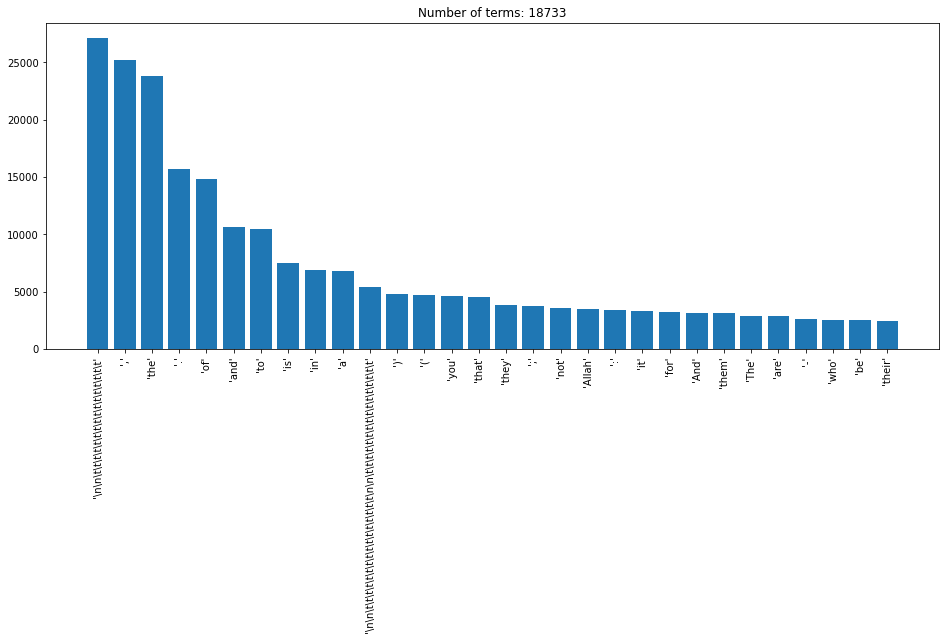

In [92]:
plot_words(['%r' % t.text for t in doc])

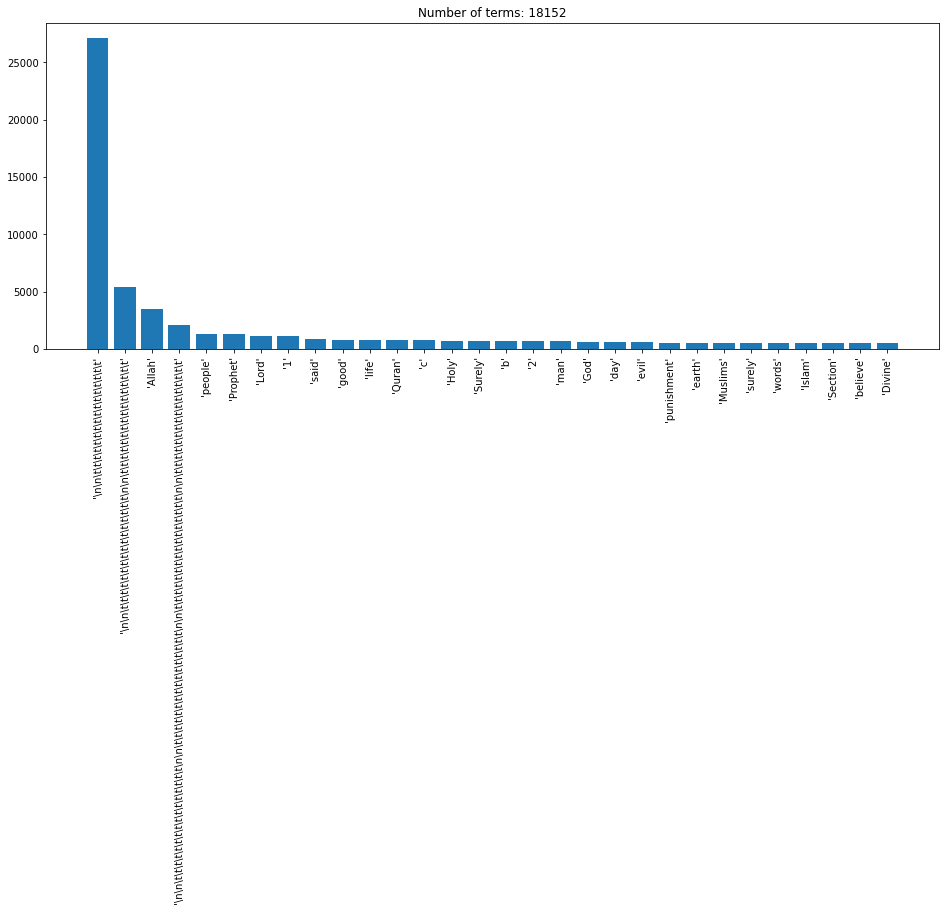

In [93]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

In [94]:
# use nltk to find tokens
tokens = nltk.word_tokenize(my_text)

#for i, t in enumerate(tokens[:25]):
#    print('%2d| %r' % (i+1, t))

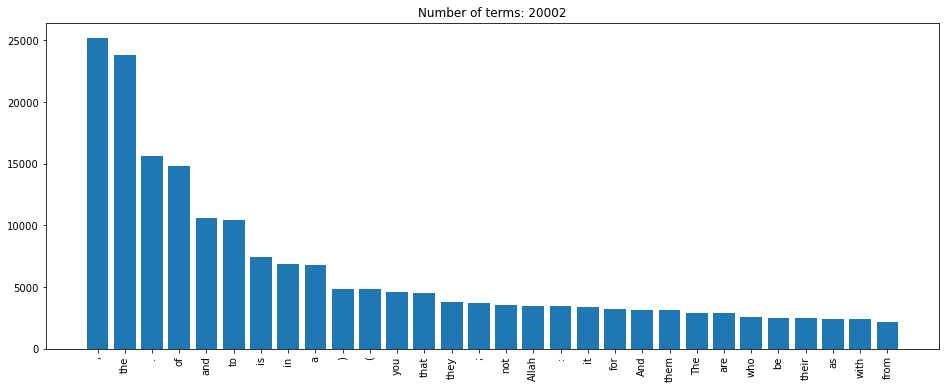

In [95]:
plot_words(tokens)

# Stop Words

## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
 #   if t.text == '.':
 #       break

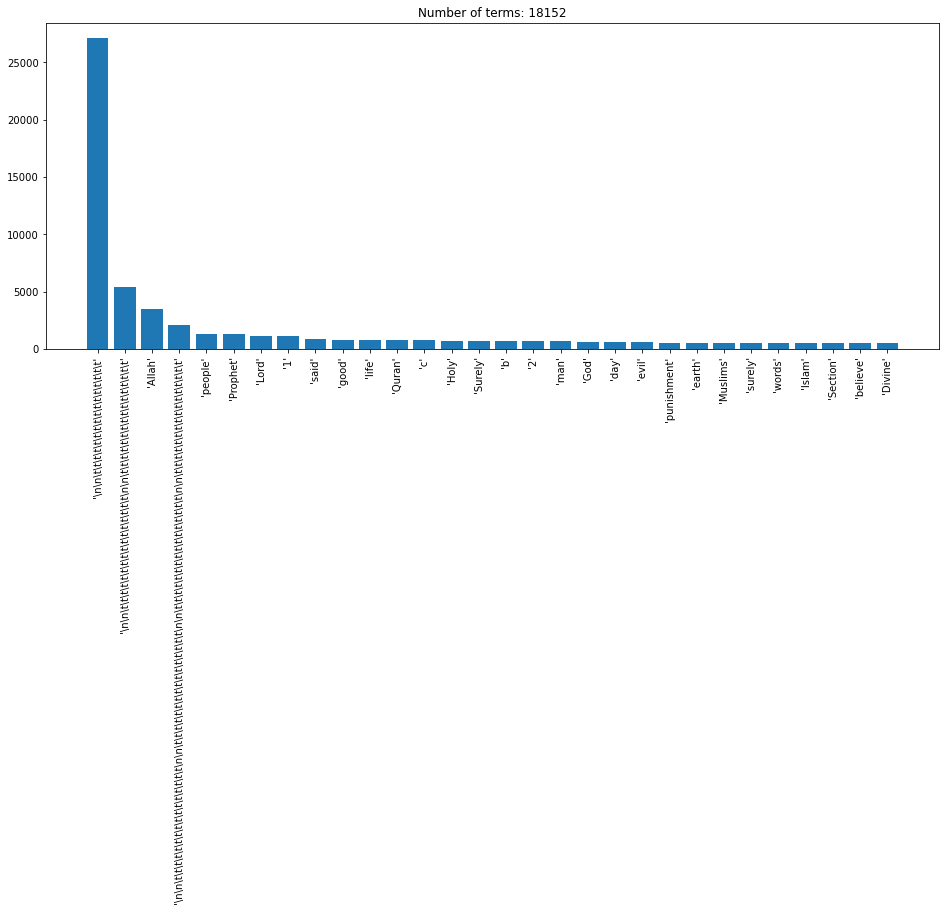

In [96]:

plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

In [97]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [98]:
tokens_no_stop = ('opportunity', 'temporarily', 'the', 'tree') # create a list of tokens withOUT the stop words 

## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
  #  if tokens[i-1] == '.':
  #      break

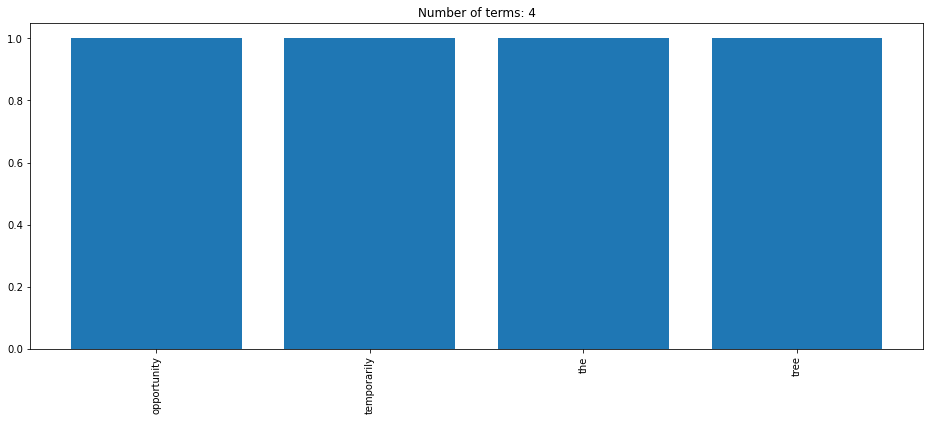

In [99]:
plot_words(tokens_no_stop)

# Check Parts of Speech

## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    #if t.text == '.':
    #    break

In [100]:
matrix_type=[]

## spaCy
for i, t in enumerate(doc):
#print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    matrix_type.append(t.pos_)



In [101]:
matrix_type2=[]

In [102]:
## spaCy
for i, t in enumerate(doc):
#print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    matrix_type2.append(t.pos_)

In [103]:
matrix_type_df = pd.DataFrame(matrix_type,columns=['TagType'])

In [104]:
matrix_type_df.head()

,TagType
0,PROPN
1,SPACE
2,NOUN
3,SPACE
4,NUM


In [105]:
TagType = matrix_type_df['TagType'].value_counts()  # Good

In [106]:
TagType.head(20)

NOUN     64092
PUNCT    61513
ADP      47530
DET      44066
PRON     42881
VERB     42263
SPACE    34616
AUX      28721
PROPN    25124
NUM      22926
ADJ      18917
CCONJ    17928
ADV      16927
SCONJ     9762
PART      8566
SYM       2578
X          800
INTJ       344
Name: TagType, dtype: int64

In [107]:
TagType_df = pd.DataFrame(TagType)

In [108]:
TagType_df.head()

,TagType
NOUN,64092
PUNCT,61513
ADP,47530
DET,44066
PRON,42881


In [109]:
TagType_df= TagType_df.reset_index() 
TagType_df = TagType_df.rename({'index' : 'Type'}, axis=1)

In [110]:
TagType_df.head(20)

,Type,TagType
0,NOUN,64092
1,PUNCT,61513
2,ADP,47530
3,DET,44066
4,PRON,42881
5,VERB,42263
6,SPACE,34616
7,AUX,28721
8,PROPN,25124
9,NUM,22926


In [111]:
verbs = TagType_df[TagType_df['Type'] =='VERB']

In [112]:
verbs.head()

,Type,TagType
5,VERB,42263


# From https://www.dataquest.io/blog/natural-language-processing-with-python/

In [113]:
transform_functions = [
    lambda x: len(x),
    lambda x: x.count(" "),
    lambda x: x.count("."),
    lambda x: x.count("!"),
    lambda x: x.count("?"),
    lambda x: len(x) / (x.count(" ") + 1),
    lambda x: x.count(" ") / (x.count(".") + 1),
    lambda x: len(re.findall("d", x)),
    lambda x: len(re.findall("[A-Z]", x)),
]


In [114]:
sentence_df.head()

,Sentence
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...
2,that the Prophet Muhammad was born.
3,"He came of the noblest family of Arabia, the Q..."
4,At the time of his birth Arabia was steeped de...


In [115]:

# Apply each function and put the results into a list.
columns = []
for func in transform_functions:
    columns.append(sentence_df["Sentence"].apply(func))
    # Convert the meta features to a numpy array.
meta = np.asarray(columns).T

In [116]:
sentence_df.head()

,Sentence
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...
2,that the Prophet Muhammad was born.
3,"He came of the noblest family of Arabia, the Q..."
4,At the time of his birth Arabia was steeped de...


In [117]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x12ace3d54c8>,
 [Text(-0.4397759950383665, 1.008264387047373, 'NOUN'),
  Text(-1.0319978180378675, 0.38076305435937535, 'PUNCT'),
  Text(-1.0347006337810152, -0.3733558603439426, 'ADP'),
  Text(-0.6540061684482616, -0.8844636406498712, 'DET'),
  Text(-0.08653128730741093, -1.0965912348349873, 'PRON'),
  Text(0.4958634740537096, -0.9818958270098648, 'VERB'),
  Text(0.9017390324682054, -0.6299735846234389, 'SPACE'),
  Text(1.077335085584482, -0.22214660332464478, 'AUX'),
  Text(1.0888992850027301, 0.15587927097771262, 'PROPN'),
  Text(0.9902351564767363, 0.4789930426190904, 'NUM'),
  Text(0.8276725981374036, 0.7245399024846597, 'ADJ'),
  Text(0.6349232477188662, 0.898260802610315, 'CCONJ'),
  Text(0.41986087848009845, 1.0167186644897988, 'ADV'),
  Text(0.24043448371530374, 1.0734017230471335, 'SCONJ'),
  Text(0.11281564278488596, 1.094199538815034, 'PART'),
  Text(0.03434350675013428, 1.0994637436241832, 'SYM'),
  Text(0.010503694000857414, 1.0999498499533

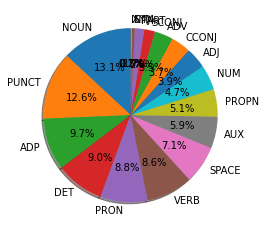

In [118]:
fig1, ax1 = plt.subplots()
ax1.pie(TagType_df['TagType'] ,  labels=TagType_df['Type'] , autopct='%1.1f%%',  shadow=True, startangle=90)

In [119]:
sentence_df.describe()

,Sentence
count,17269
unique,17034
top,"In the name of Allah, the Beneficent, the Merc..."
freq,35


# Lemmatisation

In [120]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'Koran'      'Koran'
 2| '\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t' '\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'
 3| 'Introduction' 'introduction'
 4| '\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t' '\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'
 5| '1'          '1'
 6| '.'          '.'


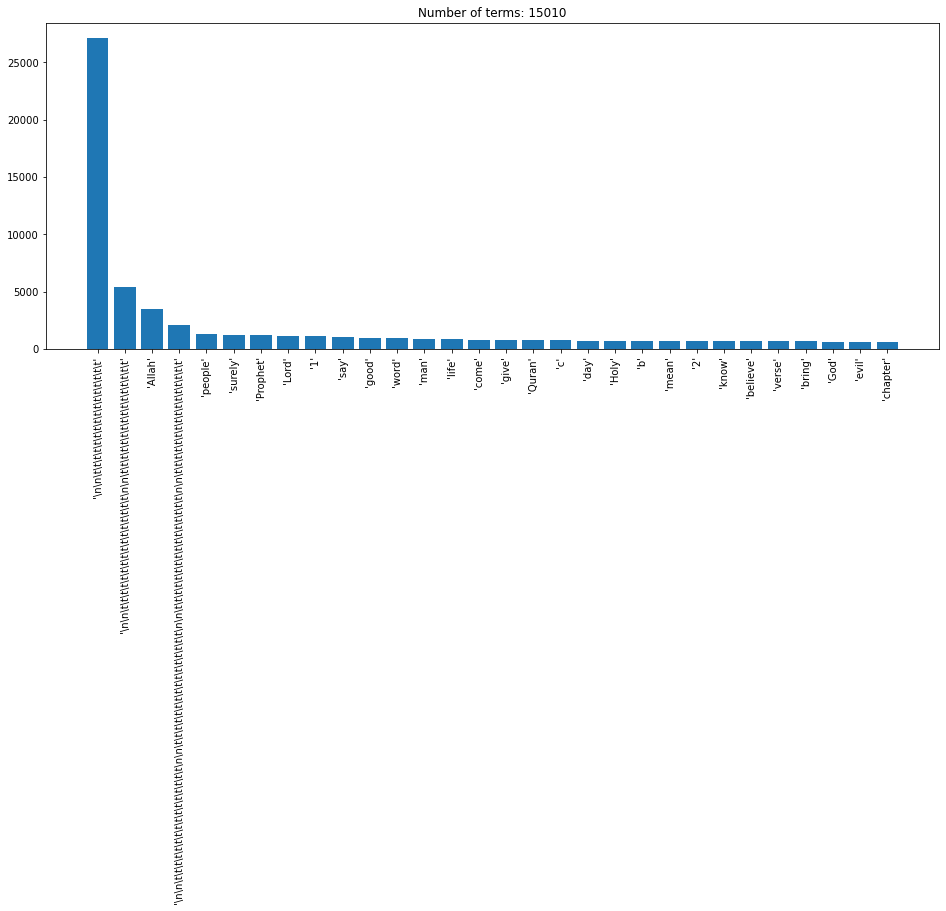

In [121]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

# Identify Entities

## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

# Tokenise

In [122]:
# use nltk to find tokens
tokens = nltk.word_tokenize(my_text)

#for i, t in enumerate(tokens[:25]):
#    print('%2d| %r' % (i+1, t))

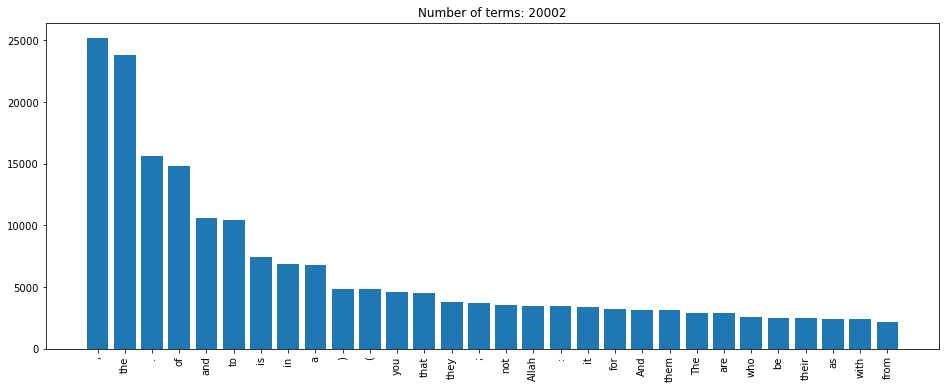

In [123]:
plot_words(tokens)

In [124]:
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [125]:
## nltk
tagged = nltk.pos_tag(tokens)

#for i, t in enumerate(tagged[:50]):
#    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

# stemming

In [126]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in my_text.split()])

### Lemmatization

In [127]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in my_text.split()])

In [128]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()



print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

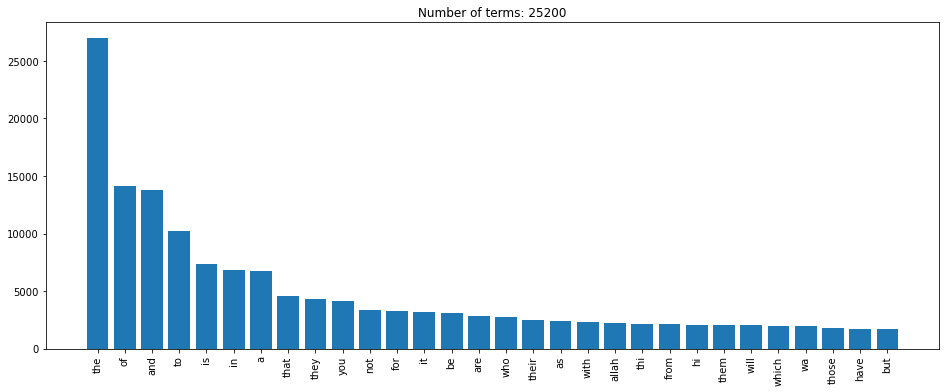

In [129]:
plot_words(stemmed.split())

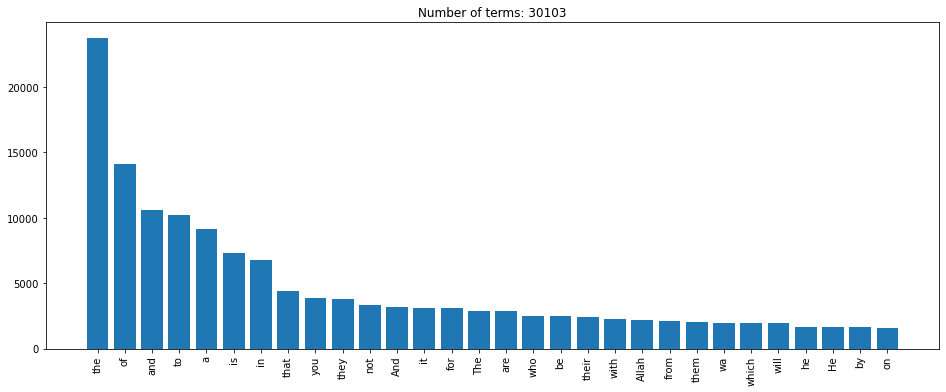

In [130]:
plot_words(lemma.split())

# Identities

In [131]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        #print('%-12s: %s' % (t, n))

In [132]:
type(entities)

nltk.tree.Tree

In [133]:
#Combo['Catc'] =[]

In [134]:
typea=[]
Type_Detail=[]
for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        #print('%-12s: %s' % (t, n))
        typea.append(t)
        Type_Detail.append(n)

In [135]:
#print(typea)

In [136]:
#print(typea)

In [137]:
typea2=pd.DataFrame( list(reader(typea)))
Type_Detail=pd.DataFrame( list(reader(Type_Detail)))


In [138]:
print(type(Type_Detail))

<class 'pandas.core.frame.DataFrame'>


In [139]:
#typea2

In [140]:
Type_Detail

,0
0,Koran
1,Prophet
2,Prophet Muhammad
3,Arabia
4,Quraish
...,...
16397,Founder
16398,Movement
16399,Maulana Muhammad Ali
16400,Islam


In [141]:
Type_Detail['Detail'] = Type_Detail

In [142]:
Type_Detail['Category'] = typea2

In [143]:
#typea2

In [144]:
Type_Detail

,0,Detail,Category
0,Koran,Koran,PERSON
1,Prophet,Prophet,ORGANIZATION
2,Prophet Muhammad,Prophet Muhammad,ORGANIZATION
3,Arabia,Arabia,GPE
4,Quraish,Quraish,GPE
...,...,...,...
16397,Founder,Founder,ORGANIZATION
16398,Movement,Movement,ORGANIZATION
16399,Maulana Muhammad Ali,Maulana Muhammad Ali,PERSON
16400,Islam,Islam,GPE


In [145]:
#Type_Detail['Category'] = typea2['Category'] 

In [146]:
Type_Detail['Category'].value_counts()

PERSON          6285
ORGANIZATION    5179
GPE             4827
FACILITY          50
LOCATION          33
GSP               28
Name: Category, dtype: int64

In [147]:
Type_Detail.head()

,0,Detail,Category
0,Koran,Koran,PERSON
1,Prophet,Prophet,ORGANIZATION
2,Prophet Muhammad,Prophet Muhammad,ORGANIZATION
3,Arabia,Arabia,GPE
4,Quraish,Quraish,GPE


In [148]:
Type_Detail['Concat'] = (Type_Detail['Detail'] + Type_Detail['Category'])

In [149]:
Type_Detail.shape

(16402, 4)

In [150]:
Type_Detail_Full = Type_Detail.copy()

In [151]:
People_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='PERSON']
People_List = People_Full['Detail'].value_counts()
People_List=pd.DataFrame(People_List) #, columns = 'çount')
People_List.head(20)

,Detail
Allah,2394
Islam,244
Jesus,161
Muslims,161
Him,154
God,144
Abraham,113
Pharaoh,85
Joseph,75
Divine,74


In [152]:
Place_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='GPE']
Place_List = Place_Full['Detail'].value_counts()
Place_List=pd.DataFrame(Place_List)
Place_List.head(20)

,Detail
Allah,852
Quran,329
Divine,295
Islam,252
Truth,199
Moses,137
God,128
Him,120
Makkah,114
Us,97


In [153]:
Org_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='ORGANIZATION']
Org_List = Org_Full['Detail'].value_counts()
Org_List=pd.DataFrame(Org_List)
Org_List.head(20)

,Detail
Holy Prophet,445
Prophet,418
Muslims,235
Lord,218
Book,217
Beneficent,179
Muslim,173
Merciful,159
Quran,134
THE,112


In [154]:
FACILITY_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='FACILITY']
Facility_List = FACILITY_Full['Detail'].value_counts()
Facility_List=pd.DataFrame(Facility_List)
Facility_List.head(20)

,Detail
Madinah,26
Garden,12
Israelite,5
Gardens,4
Best Judge,1
Israelites,1
White,1


In [155]:
GSP_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='GSP']
GSP_List = GSP_Full['Detail'].value_counts()
GSP_List=pd.DataFrame(GSP_List)
GSP_List.head(20)

,Detail
Syria,17
Us,4
North Africa,2
Praiseworthy,2
Constantine,1
Damascus,1
Israel,1


In [156]:
LOCATION_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='LOCATION']
Location_List = LOCATION_Full['Detail'].value_counts()
Location_List=pd.DataFrame(GSP_List)
Location_List.head(20)

,Detail
Syria,17
Us,4
North Africa,2
Praiseworthy,2
Constantine,1
Damascus,1
Israel,1


In [157]:
Type_Detail.drop_duplicates(subset ="Concat",  keep = False, inplace = True) 

In [158]:
Type_Detail.shape

(1156, 4)

In [159]:
Type_Detail.head()

,0,Detail,Category,Concat
0,Koran,Koran,PERSON,KoranPERSON
10,Ignorance,Ignorance,PERSON,IgnorancePERSON
16,Tribe,Tribe,PERSON,TribePERSON
39,Khadijah,Khadijah,PERSON,KhadijahPERSON
49,Hira,Hira,GPE,HiraGPE


In [160]:
Type_Detail['Category'].value_counts()

ORGANIZATION    495
PERSON          407
GPE             245
GSP               3
FACILITY          3
LOCATION          3
Name: Category, dtype: int64

In [161]:
People= Type_Detail[Type_Detail['Category'] =='PERSON']
Places= Type_Detail[Type_Detail['Category'] =='GPE']
Orgs= Type_Detail[Type_Detail['Category'] =='ORGANIZATION']

In [162]:
Orgs['Detail'].head(30)

81                  HashimitesS
123                    Refugees
186                     Bedouin
241               Roman Emperor
264                    QuraishS
268                        Marr
301                     Hawazin
329    INTRODUCTION Deputations
343                Mount Arafat
361                      Hanifs
370                 Sacred Book
391         INTRODUCTION For/IN
432         Farewell Pilgrimage
459                  Omnipotent
492           Clear/JJ Argument
493                 Explanation
510                    Verifier
526            Final Revelation
545               New Testament
558             Liberal/JJ View
590         INTRODUCTION And/CC
603                    Immunity
672       Quranic Text Among/IN
750           INTRODUCTION Such
762                     Yamamah
768                        Zaid
895                 Alif Lam Rd
914                 AlifLam Mim
963                Introduction
971              Great/NN Maker
Name: Detail, dtype: object

In [163]:
Places['Detail'].head(30)

49            Hira
79      Hashimites
122      Muhajirun
218        Makkans
227       MagiansS
356           Rabi
442         Hijrah
480       Guidance
683           High
690         Caliph
697       Tirmidhi
824     Azarbaijan
842       Madinite
868            Ali
1006       Hidayat
1102       Mankind
1192        Furqdn
1225      SabiansS
1394         Babel
1538         Kedar
1573        Submit
1788         Hagar
1978    Muzdalafah
1987     Sacrifice
2009         Mihad
2226      Religion
2276       Ezekiel
2441         Injil
2476        Isaiah
2513     Unlearned
Name: Detail, dtype: object

In [164]:
People['Detail'].head(60)

0                     Koran
10                Ignorance
16                    Tribe
39                 Khadijah
245                Chosroes
349                   Satan
448     Madinan Revelations
477                   Shifa
500      Earlier Scriptures
501              Scriptures
509                Guardian
531             Divine Will
555                   Uriah
629       Woman Spiritually
657                Monogamy
698                   Abwdb
714             Arrangement
739                 Baqarah
770                  Search
808                  Memory
820               Hudhaifah
836                  Zubair
837            Abdur Rahman
838                  Harith
839                  Hisham
996                  Master
1103                   Need
1206                    Eat
1226                Judaism
1249                Mujahid
1304               Quraizah
1308                Khazraj
1380                  Babel
1381                 Mariit
1384                     Rd
1396                

In [165]:
#typea2 = typea2.rename({'0' : 'Categ'}, axis=1)

# Look at Data

In [166]:
dfs = my_text

In [167]:
import sys
sys.getsizeof(my_text)

5850246

In [168]:
#print(entities)

In [169]:
#print(sentences)

# Get into a datafram


In [170]:
#Total1 =pd.DataFrame( list(reader(my_original_text)))
#Total1.head()

In [171]:
#Total2 =pd.DataFrame( list(reader(sentences)))

# Add counts

In [172]:
sentence_df['sentence_length'] = sentence_df['Sentence'].apply(len)
sentence_df['word_count'] = sentence_df['Sentence'].apply(lambda x: len(x.split()))
sentence_df['word_density'] = sentence_df['sentence_length'] / (sentence_df['word_count'] + 1)
sentence_df['punctuation_count'] = sentence_df['Sentence'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
sentence_df['title_word_count'] = sentence_df['Sentence'].apply(lambda x: len([w for w in x.split() if w.istitle()]))
sentence_df['uppercase_word_count'] = sentence_df['Sentence'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

In [173]:
sentence_df.head(10)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0
5,The Ka'bah \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,125,16,7.352941,5,1,0
6,"Unhewn stones, trees and heaps of sand were al...",78,10,7.090909,2,1,0
7,In spite of this vast and deep-rooted idolatry...,169,23,7.041667,6,2,0
8,There was practically no faith in the life aft...,121,17,6.722222,3,1,0
9,"The Arabs, however, \n\n\t\t\t\t\t\t\t\t\t\t\t...",138,16,8.117647,4,2,0


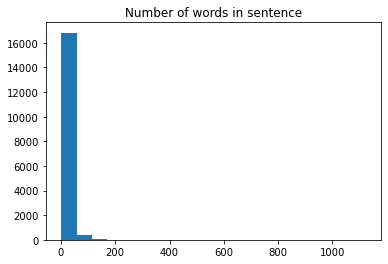

In [174]:
import matplotlib.pyplot as plt
num_bins = 20
plt.title('Number of words in sentence')
plt.hist(sentence_df['word_count'], bins =num_bins)
plt.show()


In [175]:
sentence_df.sum()

Sentence                Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...
sentence_length                                                   2698745
word_count                                                         387049
word_density                                                       108537
punctuation_count                                                   78441
title_word_count                                                    45476
uppercase_word_count                                                 3497
dtype: object

In [176]:
sentence_df.describe()

,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
count,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000
mean,156.276854,22.412936,6.285101,4.542301,2.633389,0.202502
std,212.242314,21.727390,1.619516,16.860872,2.346220,0.751373
min,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000
25%,76.000000,12.000000,5.647059,2.000000,1.000000,0.000000
50%,125.000000,19.000000,6.250000,3.000000,2.000000,0.000000
75%,194.000000,28.000000,6.840000,5.000000,3.000000,0.000000
max,11812.000000,1123.000000,34.715385,972.000000,97.000000,11.000000


In [177]:
# From 9.6

In [178]:
def convert_text(text):
    '''
    Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.
    '''
    doc = nlp(text)
    tokens = [t for t in doc if not (t.is_stop | t.is_punct)]
    tokens = [t.lemma_ for t in tokens]
    clean_text = ' '.join(tokens)

    return clean_text

In [179]:
sentence_df['short'] = sentence_df['Sentence'].apply(convert_text)

In [180]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0,Koran \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n...
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1,life Prophet Muhammad \n\n\t\t\t\t\t\t\t\t\t\t...
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0,Prophet Muhammad bear
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0,come noble family Arabia quraish \n\n\t\t\t\t\...
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0,time birth Arabia steep deep bad form \n\n\t\t...


# Add Sentiment
* https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer

In [181]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0,Koran \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n...
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1,life Prophet Muhammad \n\n\t\t\t\t\t\t\t\t\t\t...
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0,Prophet Muhammad bear
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0,come noble family Arabia quraish \n\n\t\t\t\t\...
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0,time birth Arabia steep deep bad form \n\n\t\t...


In [182]:
sentence_df.shape

(17269, 8)

In [183]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [184]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [185]:
stripped_df.head()

,Words
0,Koran
1,Introduction
2,1
3,Life
4,of


In [186]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0,Koran \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n...
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1,life Prophet Muhammad \n\n\t\t\t\t\t\t\t\t\t\t...
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0,Prophet Muhammad bear
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0,come noble family Arabia quraish \n\n\t\t\t\t\...
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0,time birth Arabia steep deep bad form \n\n\t\t...


In [191]:
sia = SIA()
results = []

for i in range (len(sentence_df)):
    pol_score = sia.polarity_scores(sentence_df['Sentence'][i])
    results.append(pol_score)
    #print(i)
    #print(results)

In [192]:
 print(type(results))

<class 'list'>


In [193]:
 #print(results)

In [194]:
results_df = pd.DataFrame(results) #.reset_index()

In [195]:
results_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.000,1.000,0.0,0.0000
2,0.000,1.000,0.0,0.0000
3,0.000,1.000,0.0,0.0000
4,0.157,0.843,0.0,-0.6249


In [196]:
results_df.shape

(17269, 4)

In [197]:
sentence_df.shape

(17269, 8)

In [198]:
results_df['AlexMarker'] = "TBD"
results_df['AlexMarkerPrevalent'] = "TBD"

In [199]:
results_df.head()

,neg,neu,pos,compound,AlexMarker,AlexMarkerPrevalent
0,0.000,1.000,0.0,0.0000,TBD,TBD
1,0.000,1.000,0.0,0.0000,TBD,TBD
2,0.000,1.000,0.0,0.0000,TBD,TBD
3,0.000,1.000,0.0,0.0000,TBD,TBD
4,0.157,0.843,0.0,-0.6249,TBD,TBD


In [200]:
for i in range (len(results_df)):
   # print(results_df['neg'][i] )
    if results_df['neg'][i] >  results_df['pos'][i]:
        if results_df['neg'][i] >  results_df['neu'][i]:
            results_df['AlexMarker'][i] ="Negative"
        else:
            results_df['AlexMarker'][i] ="Neutral"
    else:
        if results_df['pos'][i] >  results_df['neu'][i]:
            results_df['AlexMarker'][i] ="Positive"
        else:
            results_df['AlexMarker'][i] ="Neutral"


C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launch

In [201]:
results_df.head()

,neg,neu,pos,compound,AlexMarker,AlexMarkerPrevalent
0,0.000,1.000,0.0,0.0000,Neutral,TBD
1,0.000,1.000,0.0,0.0000,Neutral,TBD
2,0.000,1.000,0.0,0.0000,Neutral,TBD
3,0.000,1.000,0.0,0.0000,Neutral,TBD
4,0.157,0.843,0.0,-0.6249,Neutral,TBD


In [202]:
sentence_df['neg'] = results_df['neg']
sentence_df['neu'] = results_df['neu']
sentence_df['pos'] = results_df['pos']
sentence_df['compound'] = results_df['compound']
sentence_df['AlexMarker'] = results_df['AlexMarker']

In [203]:
sentence_df['AlexMarker'].value_counts()

Neutral     16795
Positive      302
Negative      172
Name: AlexMarker, dtype: int64

In [204]:
sentence_df.head(20)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0,Koran \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n...,0.000,1.000,0.000,0.0000,Neutral
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1,life Prophet Muhammad \n\n\t\t\t\t\t\t\t\t\t\t...,0.000,1.000,0.000,0.0000,Neutral
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0,Prophet Muhammad bear,0.000,1.000,0.000,0.0000,Neutral
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0,come noble family Arabia quraish \n\n\t\t\t\t\...,0.000,1.000,0.000,0.0000,Neutral
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0,time birth Arabia steep deep bad form \n\n\t\t...,0.157,0.843,0.000,-0.6249,Neutral
5,The Ka'bah \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,125,16,7.352941,5,1,0,Ka'bah \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t id...,0.000,1.000,0.000,0.0000,Neutral
6,"Unhewn stones, trees and heaps of sand were al...",78,10,7.090909,2,1,0,unhewn stone tree heap sand \n\n\t\t\t\t\t\t\t...,0.000,0.709,0.291,0.5719,Neutral
7,In spite of this vast and deep-rooted idolatry...,169,23,7.041667,6,2,0,spite vast deep root idolatry \n\n\t\t\t\t\t\t...,0.134,0.866,0.000,-0.5267,Neutral
8,There was practically no faith in the life aft...,121,17,6.722222,3,1,0,practically faith life death \n\n\t\t\t\t\t\t\...,0.337,0.488,0.175,-0.6124,Neutral
9,"The Arabs, however, \n\n\t\t\t\t\t\t\t\t\t\t\t...",138,16,8.117647,4,2,0,Arabs \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t bel...,0.227,0.773,0.000,-0.6597,Neutral


In [205]:
sentence_df.sort_values(by=['neg'],ascending=False)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
16064,n No!,5,2,1.666667,1,1,0,n,1.000,0.000,0.000,-0.3595,Negative
16625,6 No!,5,2,1.666667,1,1,0,6,1.000,0.000,0.000,-0.3595,Negative
13506,7 Woe to every sinful liar!,27,6,3.857143,1,1,0,7 Woe sinful liar,0.833,0.167,0.000,-0.8748,Negative
3646,the sin of murder.,18,4,3.600000,1,0,0,sin murder,0.806,0.194,0.000,-0.8519,Negative
4387,182 6.,6,2,2.000000,1,0,0,182 6,0.796,0.204,0.000,-0.5994,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7342,Section 2: Nature upholds Unity \n\n\t\t\t\t\t...,205,31,6.406250,6,5,0,section 2 nature uphold Unity \n\n\t\t\t\t\t\t...,0.000,1.000,0.000,0.0000,Neutral
7343,n He \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tcause...,153,23,6.375000,6,1,0,n \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t cause g...,0.000,1.000,0.000,0.0000,Neutral
7344,Surely there is a sign \n\n\t\t\t\t\t\t\t\t\t\...,74,12,5.692308,1,1,0,surely sign \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,0.000,0.756,0.244,0.4404,Neutral
7345,12 And He has made subservient to \n\n\t\t\t\t...,103,19,5.150000,1,2,0,12 subservient \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\...,0.000,1.000,0.000,0.0000,Neutral


In [206]:
tempneg = sentence_df.sort_values(by=['neg'],ascending=False)

In [207]:
tempneg.head(10)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
16064,n No!,5,2,1.666667,1,1,0,n,1.000,0.000,0.0,-0.3595,Negative
16625,6 No!,5,2,1.666667,1,1,0,6,1.000,0.000,0.0,-0.3595,Negative
13506,7 Woe to every sinful liar!,27,6,3.857143,1,1,0,7 Woe sinful liar,0.833,0.167,0.0,-0.8748,Negative
3646,the sin of murder.,18,4,3.600000,1,0,0,sin murder,0.806,0.194,0.0,-0.8519,Negative
4387,182 6.,6,2,2.000000,1,0,0,182 6,0.796,0.204,0.0,-0.5994,Negative
12814,No \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tinjusti...,40,4,8.000000,1,1,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t injustice...,0.756,0.244,0.0,-0.7345,Negative
13641,"No, they failed them.",21,4,4.200000,2,1,0,fail,0.733,0.267,0.0,-0.6705,Negative
13563,its doom.,9,2,3.000000,1,0,0,doom,0.730,0.270,0.0,-0.4019,Negative
2419,86 3.,5,2,1.666667,1,0,0,86 3,0.722,0.278,0.0,-0.3818,Negative
2555,Say: Die in your rage.,22,5,3.666667,2,2,0,die rage,0.714,0.286,0.0,-0.8176,Negative


In [208]:
temppos = sentence_df.sort_values(by=['pos'],ascending=False)

In [209]:
temppos.head(100)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
12141,Yes!,4,1,2.000000,1,1,0,yes,0.0,0.000,1.000,0.4574,Positive
13256,1 Beneficent God!,17,3,4.250000,1,2,0,1 beneficent God,0.0,0.000,1.000,0.6900,Positive
14532,Peace!,6,1,3.000000,1,1,0,peace,0.0,0.000,1.000,0.5848,Positive
13426,1 Beneficent God!,17,3,4.250000,1,2,0,1 beneficent God,0.0,0.000,1.000,0.6900,Positive
13086,1 Beneficent God!,17,3,4.250000,1,2,0,1 beneficent God,0.0,0.000,1.000,0.6900,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,Believe; surely the promise of Allah is true.,45,8,5.000000,2,2,0,believe surely promise Allah true,0.0,0.385,0.615,0.7906,Positive
9792,c Allah creates what He pleases.,32,6,4.571429,1,2,0,c Allah create please,0.0,0.385,0.615,0.5859,Positive
3584,Surely Allah loves those who do good \n\n\t\t\...,67,9,6.700000,3,2,0,surely Allah love good \n\n\t\t\t\t\t\t\t\t\t\...,0.0,0.387,0.613,0.8591,Positive
2795,And with Allah is the best reward.,34,7,4.250000,1,2,0,Allah good reward,0.0,0.388,0.612,0.8360,Positive


In [210]:
sentence_df_sentiment_only = sentence_df.copy()

In [211]:
sentence_df_sentiment_only = sentence_df_sentiment_only.drop(["sentence_length","word_count","word_density","punctuation_count","title_word_count","uppercase_word_count" ],axis=1,inplace=True)



In [212]:
print(sentence_df_sentiment_only)

None


In [213]:
sentence_df['compound_cut'] = pd.cut(sentence_df['compound'],10)
sentence_df['pos_cut'] = pd.cut(sentence_df['pos'],10)
sentence_df['neg_cut'] = pd.cut(sentence_df['neg'],10)
sentence_df['neu_cut'] = pd.cut(sentence_df['neu'],10)

In [214]:
pd.cut(sentence_df['neg'],10)

0        (-0.001, 0.1]
1        (-0.001, 0.1]
2        (-0.001, 0.1]
3        (-0.001, 0.1]
4           (0.1, 0.2]
             ...      
17264    (-0.001, 0.1]
17265       (0.1, 0.2]
17266    (-0.001, 0.1]
17267    (-0.001, 0.1]
17268    (-0.001, 0.1]
Name: neg, Length: 17269, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [215]:
sentence_df['compound_qcut'] = pd.qcut(sentence_df['compound'],10,duplicates='drop') # duplicates='drop')
sentence_df['pos_qcut'] = pd.qcut(sentence_df['pos'],10,duplicates='drop') # duplicates='drop')
sentence_df['neg_qcut'] = pd.qcut(sentence_df['neg'],10,duplicates='drop') # duplicates='drop')
sentence_df['neu_qcut'] = pd.qcut(sentence_df['neu'],10,duplicates='drop') # duplicates='drop')

In [216]:
sentence_df.head(20)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0,Koran \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1,life Prophet Muhammad \n\n\t\t\t\t\t\t\t\t\t\t...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0,Prophet Muhammad bear,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0,come noble family Arabia quraish \n\n\t\t\t\t\...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0,time birth Arabia steep deep bad form \n\n\t\t...,0.157,0.843,...,-0.6249,Neutral,"(-0.797, -0.597]","(-0.001, 0.1]","(0.1, 0.2]","(0.8, 0.9]","(-0.997, -0.599]","(-0.001, 0.08]","(0.103, 0.157]","(0.82, 0.865]"
5,The Ka'bah \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,125,16,7.352941,5,1,0,Ka'bah \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t id...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
6,"Unhewn stones, trees and heaps of sand were al...",78,10,7.090909,2,1,0,unhewn stone tree heap sand \n\n\t\t\t\t\t\t\t...,0.000,0.709,...,0.5719,Neutral,"(0.4, 0.599]","(0.2, 0.3]","(-0.001, 0.1]","(0.7, 0.8]","(0.55, 0.718]","(0.216, 0.293]","(-0.001, 0.044]","(0.68, 0.734]"
7,In spite of this vast and deep-rooted idolatry...,169,23,7.041667,6,2,0,spite vast deep root idolatry \n\n\t\t\t\t\t\t...,0.134,0.866,...,-0.5267,Neutral,"(-0.597, -0.398]","(-0.001, 0.1]","(0.1, 0.2]","(0.8, 0.9]","(-0.599, -0.34]","(-0.001, 0.08]","(0.103, 0.157]","(0.865, 0.919]"
8,There was practically no faith in the life aft...,121,17,6.722222,3,1,0,practically faith life death \n\n\t\t\t\t\t\t\...,0.337,0.488,...,-0.6124,Neutral,"(-0.797, -0.597]","(0.1, 0.2]","(0.3, 0.4]","(0.4, 0.5]","(-0.997, -0.599]","(0.164, 0.216]","(0.237, 1.0]","(-0.001, 0.602]"
9,"The Arabs, however, \n\n\t\t\t\t\t\t\t\t\t\t\t...",138,16,8.117647,4,2,0,Arabs \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t bel...,0.227,0.773,...,-0.6597,Neutral,"(-0.797, -0.597]","(-0.001, 0.1]","(0.2, 0.3]","(0.7, 0.8]","(-0.997, -0.599]","(-0.001, 0.08]","(0.157, 0.237]","(0.734, 0.779]"


In [217]:
sentence_df['pos_cut'].value_counts()

(-0.001, 0.1]    9477
(0.1, 0.2]       3894
(0.2, 0.3]       2262
(0.3, 0.4]        990
(0.4, 0.5]        377
(0.5, 0.6]        165
(0.6, 0.7]         71
(0.7, 0.8]         17
(0.9, 1.0]         10
(0.8, 0.9]          6
Name: pos_cut, dtype: int64

In [218]:
sentence_df['pos_qcut'].value_counts()

(-0.001, 0.08]    8640
(0.08, 0.121]     1750
(0.164, 0.216]    1745
(0.293, 1.0]      1722
(0.121, 0.164]    1711
(0.216, 0.293]    1701
Name: pos_qcut, dtype: int64

In [219]:
sentence_df['neg_qcut'].value_counts()

(-0.001, 0.044]    10366
(0.044, 0.103]      1747
(0.157, 0.237]      1729
(0.237, 1.0]        1725
(0.103, 0.157]      1702
Name: neg_qcut, dtype: int64

In [220]:
sentence_df['neu_qcut'].value_counts()

(0.919, 1.0]       5179
(0.68, 0.734]      1752
(0.602, 0.68]      1740
(0.779, 0.82]      1737
(0.865, 0.919]     1727
(-0.001, 0.602]    1727
(0.82, 0.865]      1711
(0.734, 0.779]     1696
Name: neu_qcut, dtype: int64

In [221]:
sentence_df['compound_qcut'].value_counts()

(-0.34, 0.0]        6014
(0.226, 0.422]      1842
(-0.997, -0.599]    1798
(0.55, 0.718]       1776
(-0.599, -0.34]     1736
(0.718, 0.998]      1674
(0.422, 0.55]       1565
(0.0, 0.226]         864
Name: compound_qcut, dtype: int64

In [222]:
positive_df = sentence_df[sentence_df['AlexMarker']=="Positive"]

In [223]:
negative_df = sentence_df[sentence_df['AlexMarker']=="Negative"]

In [224]:
#positive_df.sample(10)

In [225]:
positive_df.shape

(302, 21)

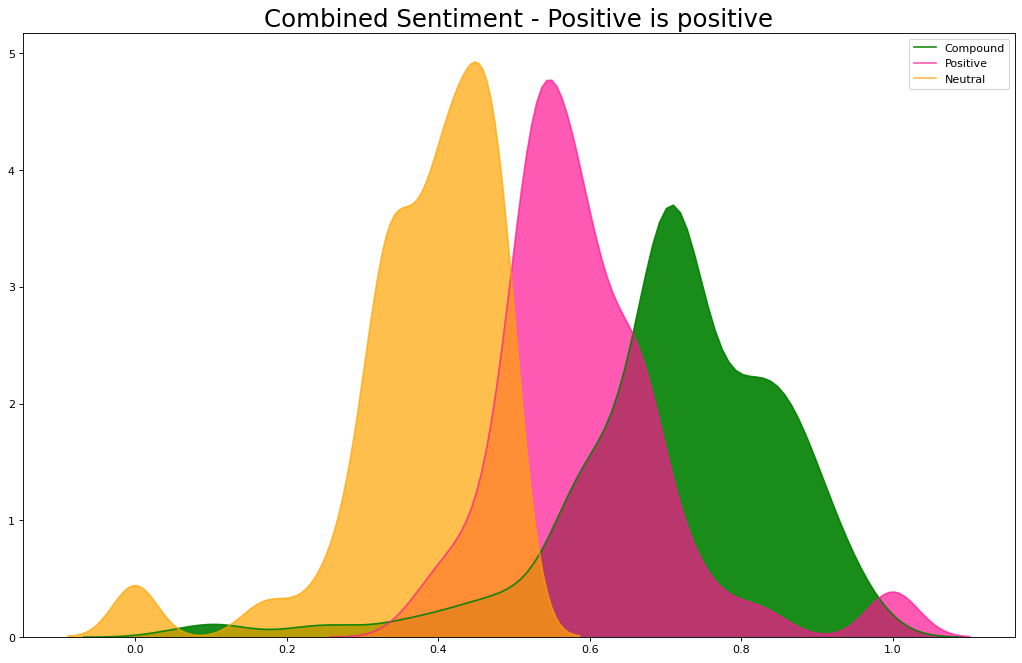

In [362]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(positive_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
sns.kdeplot(positive_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
#sns.kdeplot(positive_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
#sns.kdeplot(positive_df['neg'], shade=True, color="blue", label="Negative", alpha=.7)
sns.kdeplot(positive_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)
plt.title('Combined Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

In [227]:
sentence_df['neg'] > 5

0        False
1        False
2        False
3        False
4        False
         ...  
17264    False
17265    False
17266    False
17267    False
17268    False
Name: neg, Length: 17269, dtype: bool

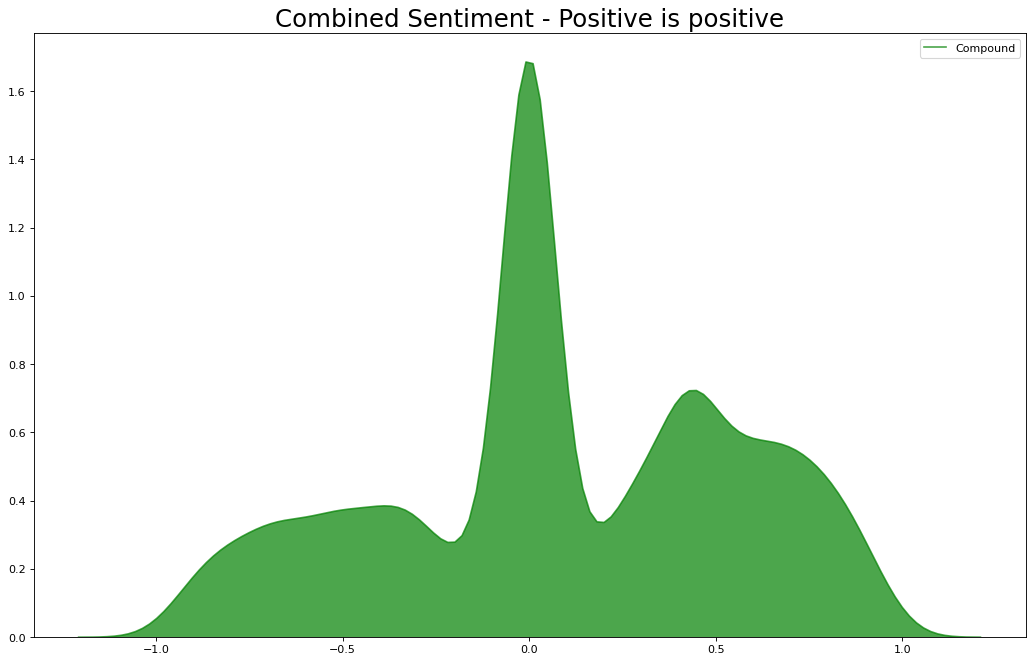

In [228]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
plt.title('Combined Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

In [229]:
negative_df.head(15)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
163,Attacks were made and repulsed in quick \n\n\t...,69,8,7.666667,1,1,0,attack repulse quick \n\n\t\t\t\t\t\t\t\t\t\t\...,0.473,0.388,...,-0.6486,Negative,"(-0.797, -0.597]","(0.1, 0.2]","(0.4, 0.5]","(0.3, 0.4]","(-0.997, -0.599]","(0.121, 0.164]","(0.237, 1.0]","(-0.001, 0.602]"
1037,And some you rejected \n\n\t\t\t\t\t\t\t\t\t\t...,66,9,6.600000,1,1,0,reject \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t kill,0.533,0.467,...,-0.8402,Negative,"(-0.998, -0.797]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.997, -0.599]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"
1076,"No, most \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\to...",49,7,6.125000,2,1,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t faith,0.393,0.357,...,-0.1531,Negative,"(-0.198, 0.0011]","(0.2, 0.3]","(0.3, 0.4]","(0.3, 0.4]","(-0.34, 0.0]","(0.216, 0.293]","(0.237, 1.0]","(-0.001, 0.602]"
1095,And for the disbelievers there is a painful pu...,55,9,5.500000,1,1,0,disbeliever painful punishment,0.504,0.496,...,-0.7269,Negative,"(-0.797, -0.597]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.997, -0.599]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"
1356,THE COW • 2 : 160 \n\n\t\t\t\t\t\t\t\t\t\t\t\t...,79,10,7.181818,6,0,2,cow 2 160 \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,0.583,0.417,...,-0.7906,Negative,"(-0.797, -0.597]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.997, -0.599]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"
1395,"Deaf, dumb, blind, so they have no \n\n\t\t\t\...",60,8,6.666667,5,1,0,deaf dumb blind \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t...,0.629,0.371,...,-0.8158,Negative,"(-0.998, -0.797]","(-0.001, 0.1]","(0.6, 0.7]","(0.3, 0.4]","(-0.997, -0.599]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"
1610,And certainly evil is the resting-place.,40,6,5.714286,2,1,0,certainly evil rest place,0.407,0.370,...,-0.4588,Negative,"(-0.597, -0.398]","(0.2, 0.3]","(0.4, 0.5]","(0.3, 0.4]","(-0.599, -0.34]","(0.216, 0.293]","(0.237, 1.0]","(-0.001, 0.602]"
1655,Say: \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFight...,59,8,6.555556,4,2,0,\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t fighting ...,0.505,0.495,...,-0.6249,Negative,"(-0.797, -0.597]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.997, -0.599]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"
2033,extreme of miserliness.,23,3,5.750000,1,0,0,extreme miserliness,0.643,0.357,...,-0.5574,Negative,"(-0.597, -0.398]","(-0.001, 0.1]","(0.6, 0.7]","(0.3, 0.4]","(-0.599, -0.34]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"
2419,86 3.,5,2,1.666667,1,0,0,86 3,0.722,0.278,...,-0.3818,Negative,"(-0.398, -0.198]","(-0.001, 0.1]","(0.7, 0.8]","(0.2, 0.3]","(-0.599, -0.34]","(-0.001, 0.08]","(0.237, 1.0]","(-0.001, 0.602]"


In [230]:
#positive_df.sample(5)

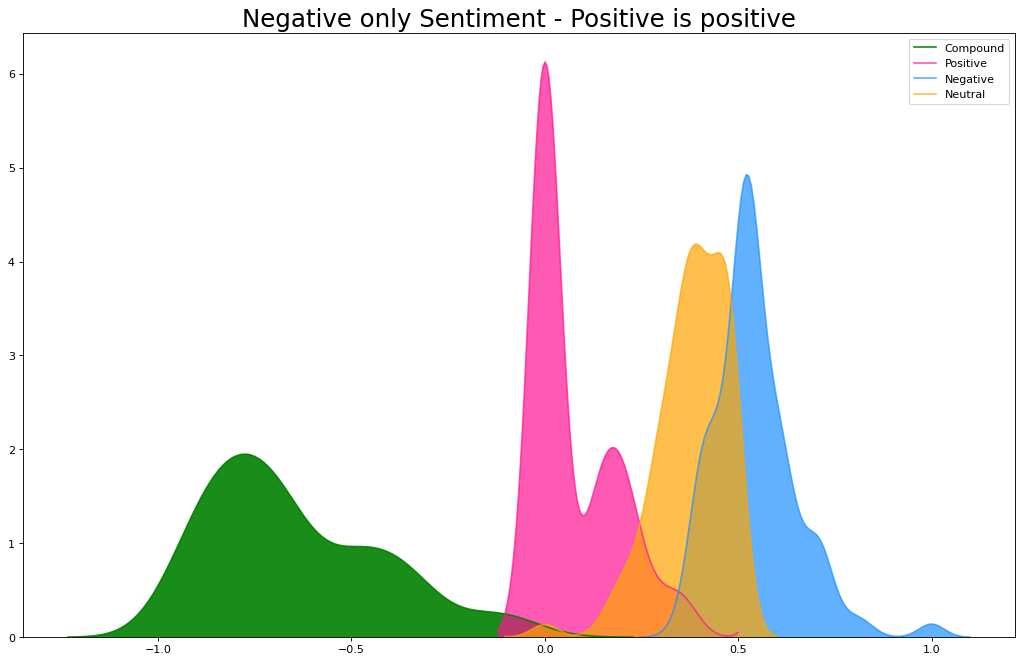

In [231]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(negative_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
sns.kdeplot(negative_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(negative_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(negative_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)
plt.title('Negative only Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

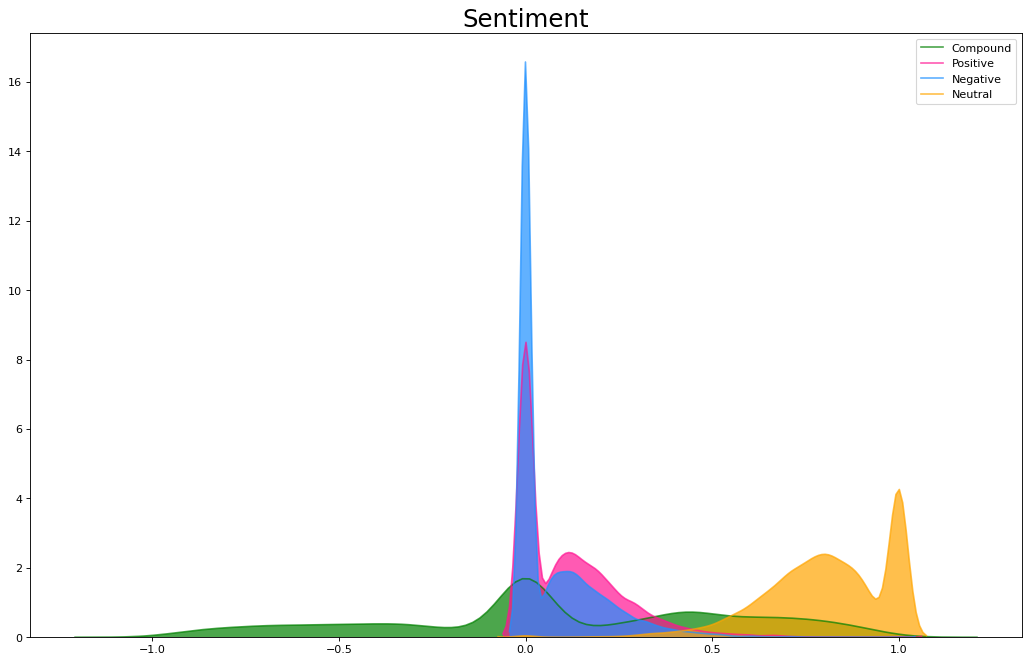

In [232]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(sentence_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)

# Decoration
plt.title('Sentiment', fontsize=22)
plt.legend()
plt.show()

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'].sentence_df['AlexMarker'] =="neu", shade=True, color="g", label="Compound", alpha=.7)
#sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
#sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
#sns.kdeplot(sentence_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)


In [233]:
results_df['AlexMarker'].value_counts()

Neutral     16795
Positive      302
Negative      172
Name: AlexMarker, dtype: int64

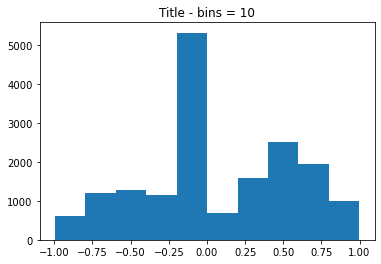

In [234]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Title - bins = 10')
plt.hist(results_df['compound'], bins =num_bins)
plt.show()



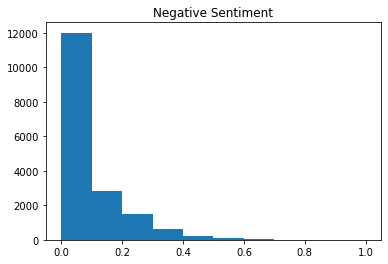

In [235]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Negative Sentiment')
plt.hist(results_df['neg'], bins =num_bins)
plt.show()

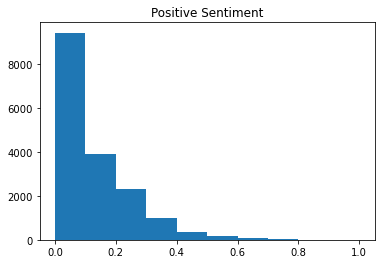

In [236]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Positive Sentiment')
plt.hist(results_df['pos'], bins =num_bins)
plt.show()

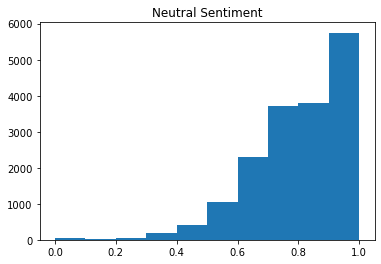

In [237]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Neutral Sentiment')
plt.hist(results_df['neu'], bins =num_bins)
plt.show()

In [238]:
import seaborn as sns

In [298]:
#g = sns.pairplot(results_df, hue="neu")

# add Word Cloud
*https://www.geeksforgeeks.org/generating-word-cloud-python/
* is good https://amueller.github.io/word_cloud/auto_examples/simple.html

In [299]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

In [300]:
wordcloudb = WordCloud(background_color="white").generate(my_text)

(-0.5, 399.5, 199.5, -0.5)

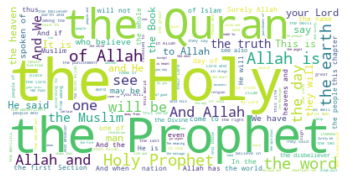

In [301]:
plt.imshow(wordcloudb, interpolation='bilinear')
plt.axis("off")

In [302]:
#mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# Multiple Word counts
* https://stackoverflow.com/questions/61218518/count-frequency-of-multi-word-terms-in-large-texts-with-python


### from * https://www.daniweb.com/programming/software-development/threads/292323/counting-phrases


In [303]:
def group_text2(text, group_size):
    """
    groups a text into text groups set by group_size
    returns a list of grouped strings
    """
    word_list = text.split()
    group_list = []
    for k in range(len(word_list)):
        start = k
        end = k + group_size
        group_slice = word_list[start: end]
        # append only groups of proper length/size
        if len(group_slice) == group_size:
            group_list.append(" ".join(group_slice))
            #GS.append(" ".join(group_slice))
    return (group_list)

In [304]:
sentence_df.shape


(17269, 21)

In [305]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
0,Koran\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\...,110,3,27.500000,1,2,0,Koran \n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
1,Life of the Prophet Muhammad* \n\n\t\t\t\t\t\t...,148,14,9.866667,3,6,1,life Prophet Muhammad \n\n\t\t\t\t\t\t\t\t\t\t...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
2,that the Prophet Muhammad was born.,35,6,5.000000,1,2,0,Prophet Muhammad bear,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
3,"He came of the noblest family of Arabia, the Q...",230,35,6.388889,7,7,0,come noble family Arabia quraish \n\n\t\t\t\t\...,0.000,1.000,...,0.0000,Neutral,"(-0.198, 0.0011]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.34, 0.0]","(-0.001, 0.08]","(-0.001, 0.044]","(0.919, 1.0]"
4,At the time of his birth Arabia was steeped de...,136,23,5.666667,1,2,0,time birth Arabia steep deep bad form \n\n\t\t...,0.157,0.843,...,-0.6249,Neutral,"(-0.797, -0.597]","(-0.001, 0.1]","(0.1, 0.2]","(0.8, 0.9]","(-0.997, -0.599]","(-0.001, 0.08]","(0.103, 0.157]","(0.82, 0.865]"


In [306]:
#text = "I love you very much so very much"
#text = sentence_df['Sentence'][1]
text = my_text

In [307]:
#print(text)

In [308]:
# Now this
Grouped_Words8=[]
for group_size in range(3,50,1):
    #group_size = 4
    #group_list = group_text2(text, group_size)
    word_list = text.split()
    group_list = []
    for k in range(len(word_list)):
        start = k
        end = k + group_size
        group_slice = word_list[start: end]
    
        group_slice_joined= (" ".join(group_slice))
  
    
        # append only groups of proper length/size
        if len(group_slice) == group_size:

            Grouped_Words8 += [group_slice_joined] #test_list += [test_str] 
# convert list to set to avoid duplicates
#print(group_list)
group_set = set(group_list)
#Grouped_Words.append(group_set)
#Grouped_Words.append(group_list)

In [309]:
#print(Grouped_Words8)

In [310]:
Grouped_Words_df = pd.DataFrame(Grouped_Words8, columns=['phrases'])

In [311]:
#Grouped_Words_df['word_count'] = Grouped_Words_df['phrases'].apply(lambda x: len(x.split()))

In [312]:
Grouped_Words_df.head()

,phrases
0,Koran Introduction 1.
1,Introduction 1. Life
2,1. Life of
3,Life of the
4,of the Prophet


In [313]:
Grouped_Words_more_than_one = Grouped_Words_df['phrases'].value_counts()

In [314]:
print(Grouped_Words_more_than_one)

the Holy Prophet                                                                                                                                                                                            283
of the Holy                                                                                                                                                                                                 230
the heavens and                                                                                                                                                                                             195
the day of                                                                                                                                                                                                  176
And Allah is                                                                                                                                                            

In [315]:
type(Grouped_Words_more_than_one)

pandas.core.series.Series

In [316]:
Grouped_Words_more_than_one.columns = ['phrase', 'count']

In [317]:
Grouped_Words_more_than_one.head()

the Holy Prophet    283
of the Holy         230
the heavens and     195
the day of          176
And Allah is        174
Name: phrases, dtype: int64

In [318]:
Grouped_Words_more_than_one_df = pd.DataFrame(Grouped_Words_more_than_one).reset_index()

In [319]:
Grouped_Words_more_than_one_df.head()

,index,phrases
0,the Holy Prophet,283
1,of the Holy,230
2,the heavens and,195
3,the day of,176
4,And Allah is,174


In [320]:
Grouped_Words_more_than_one_df.columns = ['phrase', 'count']

In [321]:
Grouped_Words_more_than_one_df.head()

,phrase,count
0,the Holy Prophet,283
1,of the Holy,230
2,the heavens and,195
3,the day of,176
4,And Allah is,174


In [322]:
Grouped_Words_more_than_one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17941091 entries, 0 to 17941090
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   phrase  object
 1   count   int64 
dtypes: int64(1), object(1)
memory usage: 273.8+ MB


In [323]:
GW_short= Grouped_Words_more_than_one_df[Grouped_Words_more_than_one_df['count'] > 1 ]

In [324]:
GW_short.head()

,phrase,count
0,the Holy Prophet,283
1,of the Holy,230
2,the heavens and,195
3,the day of,176
4,And Allah is,174


In [325]:
#GW_short.reset_index()

In [326]:
#GW_short = GW_short.rename(columns={'index': 'phrase', 'phrases': 'count'})

In [327]:
GW_short.head()

,phrase,count
0,the Holy Prophet,283
1,of the Holy,230
2,the heavens and,195
3,the day of,176
4,And Allah is,174


In [328]:
GW_short['word_count'] = GW_short['phrase'].apply(lambda x: len(x.split()))

C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [329]:
GW_short['word_count'].value_counts()

3     36685
4     22529
5     13744
6      8923
7      6245
8      4608
9      3526
10     2781
11     2242
12     1830
13     1496
14     1240
15     1042
16      879
17      742
18      637
19      541
20      466
21      409
22      356
23      311
24      273
25      239
26      213
27      188
28      164
29      143
30      124
31      106
32       90
33       77
34       66
35       56
36       46
37       37
38       30
39       23
40       16
41       11
42        8
43        7
44        6
45        5
46        4
47        3
48        2
49        1
Name: word_count, dtype: int64

In [330]:
GW3 = GW_short[GW_short['word_count'] == 3 ]
GW3.head(10)

,phrase,count,word_count
0,the Holy Prophet,283,3
1,of the Holy,230,3
2,the heavens and,195,3
3,the day of,176,3
4,And Allah is,174,3
5,the name of,171,3
6,heavens and the,162,3
8,of those who,151,3
9,is in the,130,3
10,"of Allah, the",124,3


In [331]:
GW4 = GW_short[GW_short['word_count'] == 4 ]
GW4.head(10)

,phrase,count,word_count
7,the heavens and the,158,4
15,"Allah, the Beneficent, the",117,4
16,"of Allah, the Beneficent,",117,4
19,"the Beneficent, the Merciful.",117,4
20,"name of Allah, the",116,4
27,"the name of Allah,",116,4
35,In the name of,114,4
49,"Beneficent, the Merciful. 1",108,4
65,on the day of,88,4
77,of the heavens and,79,4


In [332]:
GW5 = GW_short[GW_short['word_count'] == 5 ]
GW5.head(10)

,phrase,count,word_count
17,"of Allah, the Beneficent, the",117,5
21,"the name of Allah, the",116,5
25,"name of Allah, the Beneficent,",116,5
28,"Allah, the Beneficent, the Merciful.",114,5
30,"In the name of Allah,",114,5
50,"the Beneficent, the Merciful. 1",108,5
79,of the heavens and the,78,5
88,the heavens and the earth,73,5
177,is in the heavens and,46,5
229,those who believe and do,39,5


In [333]:
GW6 = GW_short[GW_short['word_count'] == 6 ]
GW6.head()

,phrase,count,word_count
24,"name of Allah, the Beneficent, the",116,6
26,"the name of Allah, the Beneficent,",116,6
31,"In the name of Allah, the",114,6
33,"of Allah, the Beneficent, the Merciful.",114,6
46,"Allah, the Beneficent, the Merciful. 1",108,6


In [334]:
GW9 = GW_short[GW_short['word_count'] == 9 ]

In [335]:
GW9.shape

(3526, 3)

In [336]:
GW9

,phrase,count,word_count
38,"In the name of Allah, the Beneficent, the Merc...",113,9
51,"the name of Allah, the Beneficent, the Mercifu...",108,9
456,of the bounties of your Lord will you deny?,29,9
460,then of the bounties of your Lord will you,29,9
464,Which then of the bounties of your Lord will,29,9
...,...,...,...
113008,surely there is a lesson for you in the,2,9
113047,message comes to them of the messages of their,2,9
113056,man at the time of the revelation of the,2,9
113085,"the Beneficent, the Merciful. 1 Beneficent God...",2,9


In [337]:
GW24 = GW_short[GW_short['word_count'] == 24 ]
GW24

,phrase,count,word_count
19517,those of the idolaters with whom you made an a...,3,24
21071,"does not forbid you, with regard to those who ...",3,24
21550,"many things to say to you, but you cannot bear...",3,24
22065,He it is Who has sent His Messenger with the g...,3,24
22282,"Allah does not forbid you, with regard to thos...",3,24
...,...,...,...
110955,"to him, that when any verse was revealed, he c...",2,24
112120,the believing men that they lower their gaze a...,2,24
112162,last four years of the period of the Holy Prop...,2,24
112637,of the Holy Prophet's life at Makkah. Section ...,2,24


In [338]:
GW25 = GW_short[GW_short['word_count'] == 25 ]
GW25

,phrase,count,word_count
19490,"forbid you, with regard to those who do not fi...",3,25
19788,regard to those who do not fight you for relig...,3,25
22519,"have many things to say to you, but you cannot...",3,25
22590,"not forbid you, with regard to those who do no...",3,25
23305,"when he, the Spirit of truth, has come, he wil...",3,25
...,...,...,...
111216,of those persons who used to write the Quran a...,2,25
111311,He it is Who has sent His Messenger with the g...,2,25
112451,"for him, cast him into the river and do not fe...",2,25
112811,"to him, that when any verse was revealed, he c...",2,25


In [339]:
sentence_df.to_csv('C:/Users/alexd/Alex Folder 1/NLP Project1/sentence_df.csv')

In [340]:
#!pip install pyspellchecker

# Spelling

In [341]:
from spellchecker import SpellChecker

In [342]:
# from https://pypi.org/project/pyspellchecker/#:~:text=Utilities-,Project%20description,2%20from%20the%20original%20word.

spell = SpellChecker()  # loads default word frequency list
spell.word_frequency.load_text_file('my_text')


In [343]:
print(spell.word_frequency)

In [344]:
print(words)

['His', 'last', 'work', 'was', 'a', 'thorough', 'revision', 'of', 'his', 'translation', 'and', 'commentary', 'of', 'the', 'Quran', 'in', 'the', 'late', '1940s', ',', 'the', 'revised', 'edition', 'being', 'first', 'published', 'in', '1951', '.']


In [345]:
# from https://www.tutorialspoint.com/python_text_processing/python_spelling_check.htm

In [346]:
misspelled_words = spell.unknown(words2)  # words  # words2 # stripped


In [347]:
misspelled_words_df = pd.DataFrame(misspelled_words,columns=['Words'])

In [348]:
#print(words2)

In [349]:
print(misspelled_words)

{'', 'regene', 'hady', 'saq', 'yukhlifu', 'rejecters', 'ishmaelites', 'hawazin', 'inviter', 'dighth', 'showjou', 'gression', 'charac', 'ihram', 'fited', 'shment', 'nize', '22w', 'thamma', 'suraqa', 'lishing', 'ference', '59m', 'fection', 'disburses', 'cance', 'prin', 'proletariate', '32b', '108w', 'sition', '90rc', 'surah', 'riih', 'untrellised', 'bornness', 'abid', 'ard', '59n', 'indecencies', 'signi', 'hijiah', '24m', 'idolatress', '14b', 'phecy', 'cribe', '47th', '7th', 'versal', 'promul', 'fered', 'bour', 'umayyads', 'asr', 'quently', 'zill', 'tage', 'yaghuth', 'fatwas', 'waw', '28zi', '12n', 'nish', '108m', '7n', 'ibil', 'reproval', 'direc', 'gressing', 'neous', 'missible', 'yilz', 'assaulters', 'servient', 'stric', '124m', 'disowns', 'muddath', '193m', '70k', 'descrip', 'capabili', 'lahab', '9w', 'unbelie', 'derbent', 'ashab', '26n', 'qaum', '194n', 'gressions', 'i6n', 'mity', '199n', 'm00i1', 'subduer', 'sugges', '37n', 'balqis', 'retaliates', 'kafir', '50n', '44k', 'madinite', 

In [350]:
spell.known(misspelled_words)

set()

In [351]:
#! pip install textblob

# Blob
https://textblob.readthedocs.io/en/dev/

In [352]:

from textblob import TextBlob

In [353]:
text = my_text

In [354]:
blob = TextBlob(text)

In [355]:

#blob.tags      




blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',


                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)


# Spelling PArt 2

In [356]:
# from https://textblob.readthedocs.io/en/dev/quickstart.html#part-of-speech-tagging
b = TextBlob("burlap") #misspelled_words)
print(b, " is incorrect and correct is: " ,b.correct())


burlap  is incorrect and correct is:  bursa


In [357]:
misspelled_words_df.head()

,Words
0,
1,regene
2,hady
3,saq
4,yukhlifu


In [358]:
for i in misspelled_words_df: #range (len (misspelled_words_df)):
    temp = misspelled_words_df[i]
    str_temp= str(temp)
    bword  = TextBlob(str_temp)
    correct = bword.correct()

In [359]:
 print(bword, " is incorrent and correct is: ", correct) # ,b.correct())

0                 
1           regene
2             hady
3              saq
4         yukhlifu
           ...    
1890          18rc
1891     palpitate
1892           81w
1893        abased
1894    ishmaelite
Name: Words, Length: 1895, dtype: object  is incorrent and correct is:  0                 
1           regent
2             had
3              say
4         yukhlifu
           ...    
1890          arc
1891     palpitate
1892           now
1893        based
1894    ishmaelite
Same: Words, Length: 1895, type: object


In [360]:
 print(bword, " is incorrent and correct is: ", b.correct())

0                 
1           regene
2             hady
3              saq
4         yukhlifu
           ...    
1890          18rc
1891     palpitate
1892           81w
1893        abased
1894    ishmaelite
Name: Words, Length: 1895, dtype: object  is incorrent and correct is:  bursa
